In [63]:
# Cài đặt thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from tensorflow import keras
from sklearn.metrics import f1_score, roc_auc_score, log_loss


In [29]:
# Đọc dữ liệu từ file csv
# Bạn có thể thay đổi địa chỉ tập dữ liệu đầu vào ở đây
train_df = pd.read_csv('D:\FPTUni\SP24\MAI391\Project\Data\mnist_train.csv',header=None)
test_df = pd.read_csv('D:\FPTUni\SP24\MAI391\Project\Data\mnist_test.csv',header=None)

In [30]:
# Thể hiện một số dòng dữ liệu hoặc thông tin
train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Thể hiện một số dòng dữ liệu hoặc thông tin
test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Thể hiện thông tin của dữ liệu
print("traing data shape:",train_df.shape)
print("test  data  shape:",test_df.shape)

traing data shape: (60000, 785)
test  data  shape: (10000, 785)


Till now we have loaded our train and test datasets. We have 60000 2d (28x28) images in our training dataset and 10000 in test dataset.

columns of training data from 1 to 784 represents the pixel values and column 0 represents the corrosponding label, same goes for test data.

In [35]:
# Kiểm tra dữ liệu có giá trị thiếu không
x = train_df.isnull().sum()>0
print(x.sum())
x = test_df.isnull().sum()>0
print(x.sum())

0
0


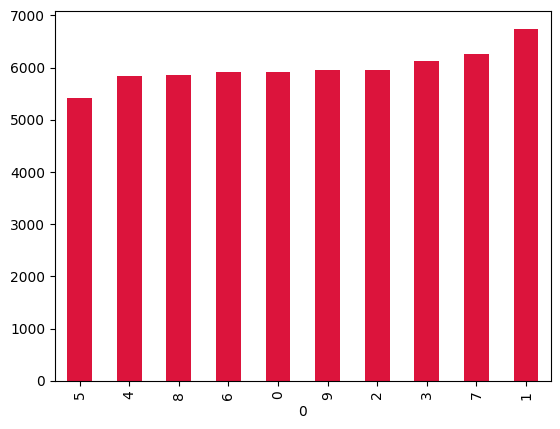

In [21]:
train_df[0].value_counts(ascending=True).plot.bar(color='crimson');

In [36]:
x_train = train_df.drop(0,axis=1).values
# Loại bỏ cột label và lấy giá trị
# Đưa dữ liệu về giá trị từ 0 đến 1
x_train = x_train/255
y_train = train_df[0].values

x_test = test_df.drop(0,axis=1).values
# Loại bỏ cột label và lấy giá trị
# Đưa dữ liệu về giá trị từ 0 đến 1
x_test = x_test/255
y_test = test_df[0].values

4


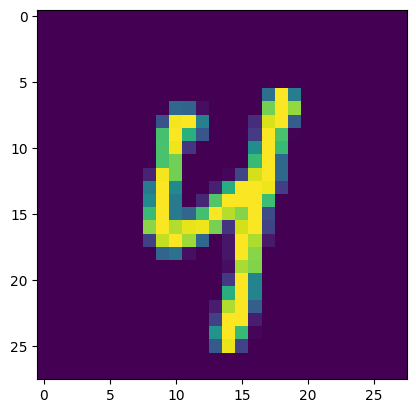

In [38]:
# Xem thử một dòng dữ liệu
print(y_train[2222])
plt.imshow(x_train[2222].reshape(28,28));

In [39]:
import tensorflow.keras as keras

# Định nghĩa mô hình Neural Network
model = keras.Sequential([
    # Lớp đầu tiên: Fully connected layer với 128 đơn vị neuron và hàm kích hoạt ReLU
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    
    # Lớp đầu ra: Fully connected layer với 10 đơn vị neuron và hàm kích hoạt sigmoid
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile mô hình
model.compile(optimizer='adam',              # Sử dụng thuật toán tối ưu hóa Adam
              loss='sparse_categorical_crossentropy',  # Hàm mất mát cho bài toán phân loại nhiều lớp
              metrics=['accuracy'])           # Đánh giá hiệu suất bằng accuracy

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(x_train,                           # Dữ liệu đầu vào
          y_train,                           # Nhãn tương ứng
          epochs=15)                         # Số lượng epochs (lặp lại tập dữ liệu)




Epoch 1/15


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2618 - accuracy: 0.9245
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1162 - accuracy: 0.9653
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0806 - accuracy: 0.9752
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0605 - accuracy: 0.9817
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0476 - accuracy: 0.9855
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0367 - accuracy: 0.9887
Epoch 7/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0300 - accuracy: 0.9906
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0243 - accuracy: 0.9924
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0

In [44]:
# Tính toán độ chính xác trên tập kiểm thử và xuất nó dưới dạng phần trăm
model.evaluate(x_test, y_test)[1]*100

313/313 [==============================] - 0s 1ms/step - loss: 0.0879 - accuracy: 0.9781


97.81000018119812

In [41]:
# Tạo dự đoán
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 817us/step


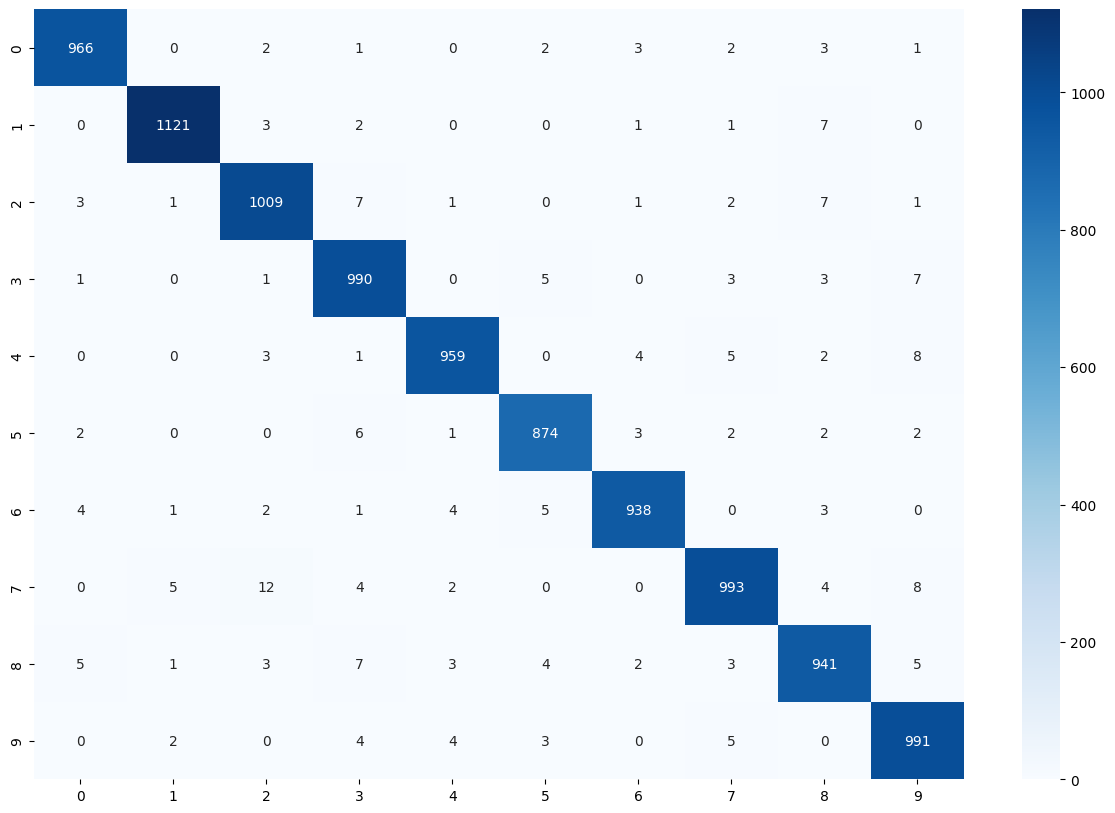

In [47]:
cf =tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_pred])
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt='d',cmap='Blues');

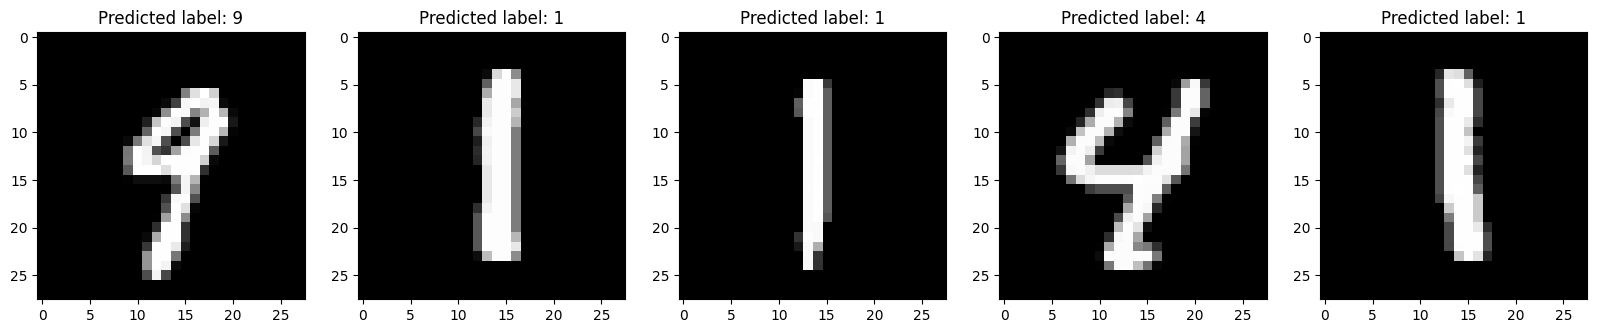

In [73]:
# Thử với một số hình ảnh random
# Chọn ngẫu nhiên 5 hình ảnh từ tập dữ liệu kiểm tra
random_indices = random.sample(range(len(x_test)), 5)

# Hiển thị hình ảnh và nhãn dự đoán tương ứng của chúng
plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')  # Hiển thị hình ảnh (reshape từ vectơ 1D thành ma trận 2D)
    plt.title('Predicted label: {}'.format(np.argmax(y_pred[idx])))  # Hiển thị nhãn dự đoán
plt.show()
